Let's import everything necessary to get ready for classification:

In [119]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import time

train = pd.read_csv('train.csv')

y = train.price_range

y = y.replace({1: 0, 2: 1, 3: 1, 4: 1})

X = train.drop('price_range', axis=1)

divide_seed = np.random.randint(1, 100)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=divide_seed)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

Populating the interactive namespace from numpy and matplotlib
1400
600
1400
600


Let's start with a linear regression:

In [120]:
lr = LinearRegression()

lr.fit(X_train, y_train)

prediction_lr = lr.predict(X_train)

print("Test result:", lr.score(X_test, y_test))

print("Train result:", lr.score(X_train, y_train))

Test result: 0.7190123344775228
Train result: 0.7169481857045205


Now, let's continue with kNN:

In [121]:
list_of_predictions_knn = list()
list_of_test_results_knn = list()
list_of_train_results_knn = list()

for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    list_of_predictions_knn.append(knn.predict(X_train))
    list_of_test_results_knn.append(knn.score(X_test, y_test))
    list_of_train_results_knn.append(knn.score(X_train, y_train))
    if i % 20 == 0:
        print("Predicted with ", i, " neighbours")

Predicted with  20  neighbours


Predicted with  40  neighbours


Predicted with  60  neighbours


Predicted with  80  neighbours


Predicted with  100  neighbours


Max test result:  0.9433333333333334  takes  98  trees


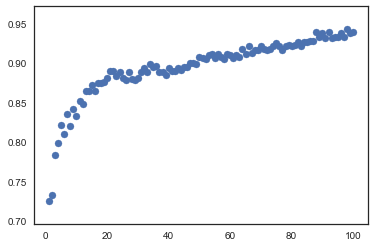

In [122]:
print("Max test result: ", max(list_of_test_results_knn), 
      " takes ", (list_of_test_results_knn.index(max(list_of_test_results_knn))+1), " trees")

plt.scatter(x=list((range(1, 101))), y=list_of_test_results_knn)

Next classifier we'll try to use is Logistic Regression:

Train result: 0.9935714285714285
Accuracy: 0.9883333333333333
AUC-ROC: 0.9884690191719923
######################################################


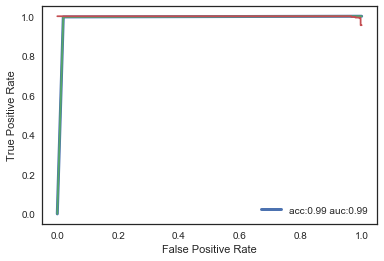

In [123]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

prediction = logistic_model.predict(X_test)

#print("Test result:", logistic_model.score(X_test, y_test))

print("Train result:", logistic_model.score(X_train, y_train))

print("Accuracy:", accuracy_score(y_test, prediction))

print("AUC-ROC:", roc_auc_score(y_test, prediction))

print("######################################################")
logistic_model_proba = LogisticRegression()

logistic_model_proba.fit(X_train, y_train)

prediction_proba = logistic_model.predict_proba(X_test)


# Now let's create the ROC-curve and PR-curve to represent our model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
fpr, tpr, _ = roc_curve(y_test, prediction)
acc = logistic_model.score(X_test, y_test)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr, tpr, label="acc:%.2f auc:%.2f" % (acc, auc), linewidth=3)
plt.legend(loc="best")

precision, recall, thresholds = precision_recall_curve(y_test, prediction_proba[:, 1])

plt.plot(fpr, tpr)

plt.plot(recall, precision)

Next step we'll take is DecisionTree model:

In [124]:
decision_tree = DecisionTreeClassifier(random_state=divide_seed)

decision_tree.fit(X_train, y_train)

prediction_tree = decision_tree.predict(X_test)

print("Test result (accuracy):", decision_tree.score(X_test, y_test))

print("Accuracy:", accuracy_score(y_test, prediction_tree))

auc_roc_tree = roc_auc_score(y_test, prediction_tree)

print("AUC-ROC:", auc_roc_tree)

print("######################################################")
decision_tree_proba = DecisionTreeClassifier(random_state=divide_seed)

decision_tree_proba.fit(X_train, y_train)

prediction_tree_proba = decision_tree_proba.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, prediction_tree_proba > 0.5))

auc_roc_tree = roc_auc_score(y_test, prediction_tree_proba)

print("AUC-ROC:", auc_roc_tree)

Test result (accuracy): 0.935
Accuracy: 0.935
AUC-ROC: 0.9353431508752431
######################################################
Accuracy: 0.935
AUC-ROC: 0.9353431508752431


This accuracy is not enough to accept this decision tree model, so, let's use bagging to try to improve it.

In [125]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=divide_seed), n_estimators=100)

bagging.fit(X_train, y_train)

prediction_bagging = bagging.predict(X_test)

#print("Test result:", bagging.score(X_test, y_test))

#print("Train result:", bagging.score(X_train, y_train))

#print("Accuracy:", accuracy_score(y_test, prediction_bagging))

auc_roc_tree = roc_auc_score(y_test, prediction_bagging)

print("######################################################")
bagging_proba = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=divide_seed), n_estimators=100)

bagging_proba.fit(X_train, y_train)

prediction_bagging_proba = bagging_proba.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, prediction_bagging_proba > 0.5))

auc_roc_tree = roc_auc_score(y_test, prediction_bagging_proba)

print("AUC-ROC:", auc_roc_tree)

######################################################


Accuracy: 0.95
AUC-ROC: 0.9943262017227008


As we can see, it worked, AUC-ROC metric gives us now 99,4%. 

But let's continue and bootstrap our sample:

In [126]:
new_predicted_tree = 0
new_predicted_tree_proba = np.zeros(X_test.shape[0])


for k in range(0, 100):
    i_new = np.random.randint(0, X_train.shape[0], int(2000*0.7))
    tree_class = DecisionTreeClassifier()
    
    tree_class.fit(X_train[i_new], array(y_train)[i_new])
    
    new_predicted_tree_proba += tree_class.predict_proba(X_test)[:, 1]
    
    new_predicted_tree += tree_class.predict(X_test)
    new_predicted_tree = np.divide(new_predicted_tree, 100).astype('int8')
    
new_predicted_tree_proba = new_predicted_tree_proba / 100
    

print("Accuracy:", accuracy_score(y_test, new_predicted_tree_proba > 0.5))
print("ROC-AUC:", roc_auc_score(y_test, new_predicted_tree_proba))

Accuracy: 0.9566666666666667
ROC-AUC: 0.9949041400388998


Comparable, but still bit worse than Bagging

Let's try RandomForestClassifier with different number of trees:

In [127]:
test_forest_results = list()
train_forest_results = list()
accuracy_forest_results = list()
auc_roc_forest_results = list()
time_list = list()

accuracy_forest_results_proba = list()
auc_roc_forest_results_proba = list()

start = time.time()
cur_time = start

for j in range(10, 1010, 10):
    
    decision_forest = RandomForestClassifier(random_state=divide_seed, n_estimators=j)
    decision_forest_proba = RandomForestClassifier(random_state=divide_seed, n_estimators=j)

    decision_forest.fit(X_train, y_train)
    
    decision_forest_proba.fit(X_train, y_train)

    prediction_forest = decision_forest.predict(X_test)
    
    prediction_forest_pr = decision_forest_proba.predict_proba(X_test)[:, 1]

    test_forest_results.append(decision_forest.score(X_test, y_test))

    train_forest_results.append(decision_forest.score(X_train, y_train))

    accuracy_forest_results.append(accuracy_score(y_test, prediction_forest))
    
    accuracy_forest_results_proba.append(accuracy_score(y_test, prediction_forest_pr > 0.5))

    auc_roc_forest = roc_auc_score(y_test, prediction_forest)

    auc_roc_forest_results.append(auc_roc_forest)
    auc_roc_forest_results_proba.append(roc_auc_score(y_test, prediction_forest_pr))
    if j % 50 == 0:
        cur_time = time.time() - cur_time
        if j % 100 != 0:
            time_list.append(cur_time)
            print('Number of trees:', j)
            print("Prediction completed by", j/10, "%")
            print("Took ", cur_time, " seconds")
            print("--------------------")
print("Prediction completed by 100%")
finish = time.time() - start

print("Prediction took ", finish, " seconds")

Number of trees: 50
Prediction completed by 5.0 %
Took  1.2758619785308838  seconds
--------------------


Number of trees: 150
Prediction completed by 15.0 %
Took  7.614757061004639  seconds
--------------------


Number of trees: 250
Prediction completed by 25.0 %
Took  16.16055393218994  seconds
--------------------


Number of trees: 350
Prediction completed by 35.0 %
Took  27.431073904037476  seconds
--------------------


Number of trees: 450
Prediction completed by 45.0 %
Took  44.8307318687439  seconds
--------------------


Number of trees: 550
Prediction completed by 55.0 %
Took  62.628031730651855  seconds
--------------------


Number of trees: 650
Prediction completed by 65.0 %
Took  86.37826180458069  seconds
--------------------


Number of trees: 750
Prediction completed by 75.0 %
Took  110.00433278083801  seconds
--------------------


Number of trees: 850
Prediction completed by 85.0 %
Took  139.39479279518127  seconds
--------------------


Number of trees: 950
Prediction completed by 95.0 %
Took  170.40877389907837  seconds
--------------------


Prediction completed by 100%
Prediction took  351.4564559459686  seconds


Max test result:  0.9583333333333334  takes  80  trees
Max accuracy result:  0.9583333333333334  takes  80  trees
Max auc-roc result:  0.9585162545151431  takes  80  trees
Max accuracy result with proba:  0.9583333333333334  takes  80  trees
Max auc-roc result with proba:  0.9944873575993332  takes  80  trees


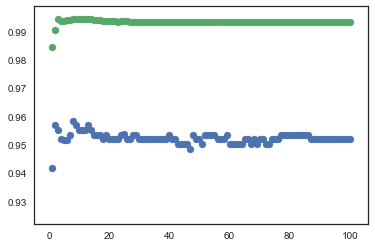

Time taken via number of trees:


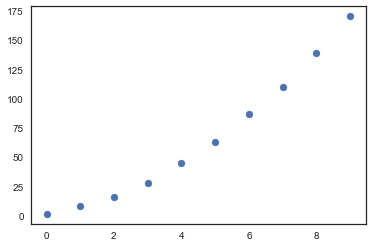

In [128]:
print("Max test result: ", max(test_forest_results), " takes ", (test_forest_results.index(max(test_forest_results))+1)*10, " trees")

print("Max accuracy result: ", max(accuracy_forest_results), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*10, " trees")

print("Max auc-roc result: ", max(auc_roc_forest_results), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*10, " trees")

print("Max accuracy result with proba: ", max(accuracy_forest_results_proba), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*10, " trees")

print("Max auc-roc result with proba: ", max(auc_roc_forest_results_proba), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*10, " trees")


plt.scatter(x=list((range(1, 101))), y=auc_roc_forest_results)

plt.scatter(x=list((range(1, 101))), y=auc_roc_forest_results_proba)
plt.show()

print("Time taken via number of trees:")
plt.scatter(x=list(range(0, 10)), y=time_list)
plt.show()

Finally, let's take a look at which features were most important in our model:

[0.05850186 0.00411376 0.01727769 0.00385603 0.01461809 0.00332405
 0.02125491 0.01355367 0.02396303 0.01379781 0.01736666 0.03979694
 0.04190182 0.66625681 0.01590934 0.01695625 0.01686919 0.00290452
 0.0042117  0.00356585]


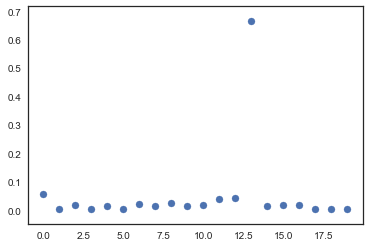

In [129]:
importances = list(decision_forest.feature_importances_)

number = list(range(0, 20, 1))

print(decision_forest.feature_importances_)

plt.scatter(x=number, y=importances)

As we can see, 14th feature is much more important than others, so it dominates and helps us build better models.